The metrics:
Age: Age in years in range 20-65
Gender: Male / Female
Polyuria: Yes / No                  #abnormally large production or passage of urine
Polydipsia: Yes / No                  #excessive thirst
Sudden weight loss: Yes / No
Weakness: Yes / No
Polyphagia: Yes / No                #excessive hunger or appetite
Genital thrush: Yes / No            #yeast infection
Visual blurring: Yes / No
Itching: Yes / No
Irritability: Yes / No
Delayed Healing: Yes / No
Partial Paresis: Yes / No           #impaired or weakened muscle movement 
Muscle stiffness: Yes / No
Alopecia: Yes / No
Obesity: Yes / No

Class Result: Positive / Negative

In [7]:
#Importing required libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np                       # Numrical Python Lib
import pandas as pd         # Data manipulation and analysis
import os
from sklearn.preprocessing import MinMaxScaler          # scales data to a given range; usually b/w 0 & 1
from sklearn.model_selection import train_test_split, cross_val_score      # Splits the dataset into training and testing subsets for model validation | Performs cross-validation by splitting data into multiple training and testing sets
from sklearn.linear_model import LogisticRegression          #creates logistic regression model; used when the target variable is binary.
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, recall_score, roc_auc_score     #Ratio of correctly predicted instances | for imbalanced classes; combination of precision and recall | ratio of true +ves to predicted +ves | table that shows true vs predicted values for each class | ratio of true +ves to all actual +ves | Area under the ROC curve, used for binary classifcication models
from xgboost import XGBClassifier          # Gradient boosting algorithm for both classification and refression tasks. Known for handling large datasets and providing high performance
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier   # gets more accurate and stable predictions | combines weak classifiers to form strong classifier by iteratively adjusting the incorrectly predicted instances
from sklearn.svm import SVC            # Supoort Vector Classifier: finds a hyperplance that best separates the classes
import matplotlib.pyplot as plt        # Visualizations and plots
%matplotlib inline                    
import seaborn as sns                  # Statistical data visualization lib for better visuals.

In [8]:
#Importing DataSets
file_path = r'C:\Users\Aishwarya\Downloads\diabetes_data_upload.csv'

# Check if the file exists
if os.path.exists(file_path):
    try:
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Display basic information about the dataset
        print("Data loaded successfully!")
        print(df.info())
        print(df.head())
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")
else:
    print("File not found. Please check the path.")

Data loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  

In [18]:
#Checking if any missing values
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

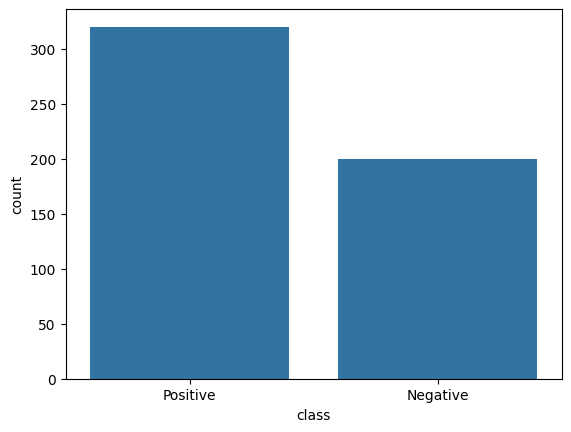

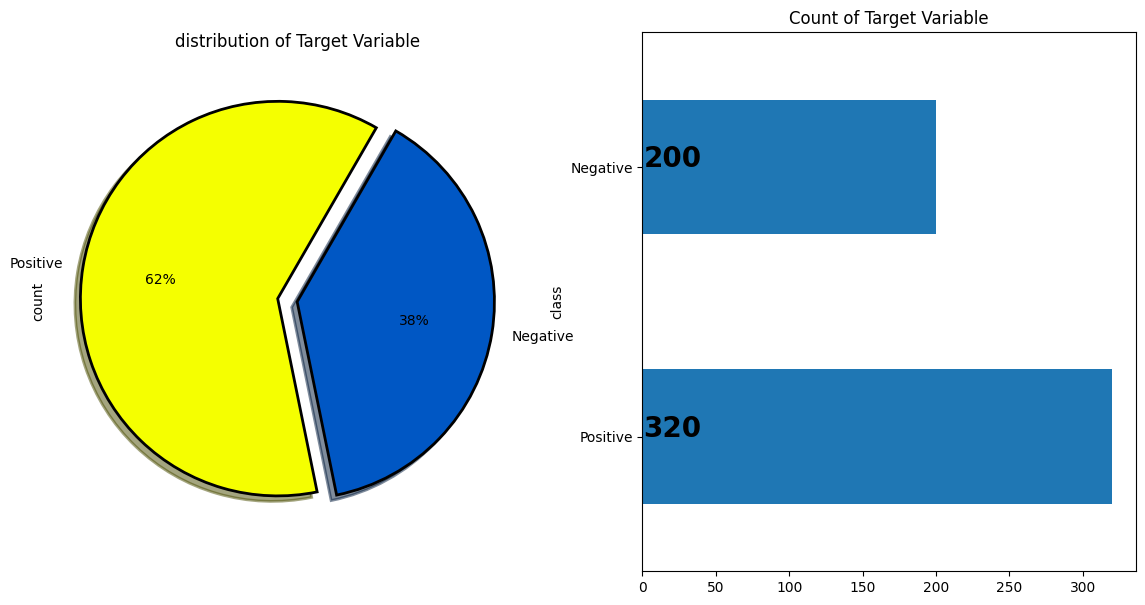

In [9]:
##Distributing different features
#Distribution of Target Variable
sns.countplot(x='class',data=df)

#plotting to create pie char and bar plot as subplots
plt.figure(figsize=(14,7))
plt.subplot(121)
df["class"].value_counts().plot.pie(autopct="%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60 , labels=["Positive","Negative"], 
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow=True)
plt.title("distribution of Target Variable")

plt.subplot(122)
ax = df["class"].value_counts().plot(kind="barh")

for i,j in enumerate (df["class"].value_counts().values):
    ax.text(0.7,i,j,weight="bold", fontsize=20)
plt.title("Count of Target Variable")
plt.show()

class,Negative,Positive
Gender,,
Female,9.500000,54.060000
Male,90.500000,45.940000


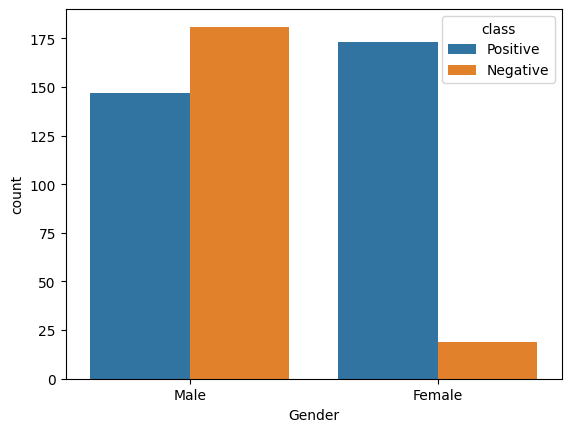

In [28]:
#Distribution of Gender
sns.countplot(x='Gender',hue='class',data=df)
plot_criteria = ['Gender','class']
cm = sns.light_palette("red",as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]],df[plot_criteria[1]], normalize = 'columns') *100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Polyuria,,
No,92.500000,24.060000
Yes,7.500000,75.940000


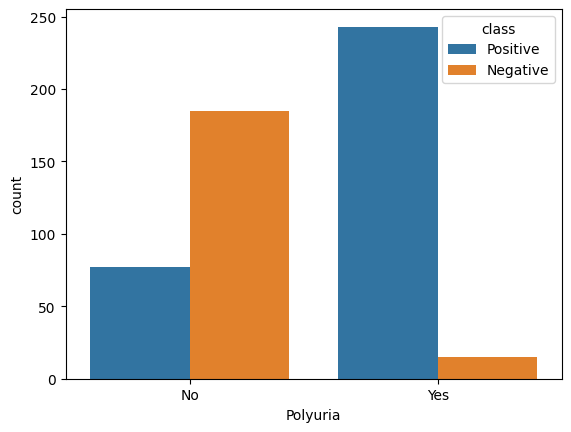

In [30]:
#Distribution of Polyuria
sns.countplot(x='Polyuria', hue='class', data=df)

plot_criteria=['Polyuria','class']
cm = sns.light_palette("red",as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]],normalize='columns') *100,2)).style.background_gradient(cmap=cm)

class,Negative,Positive
Polydipsia,,
No,96.000000,29.690000
Yes,4.000000,70.310000


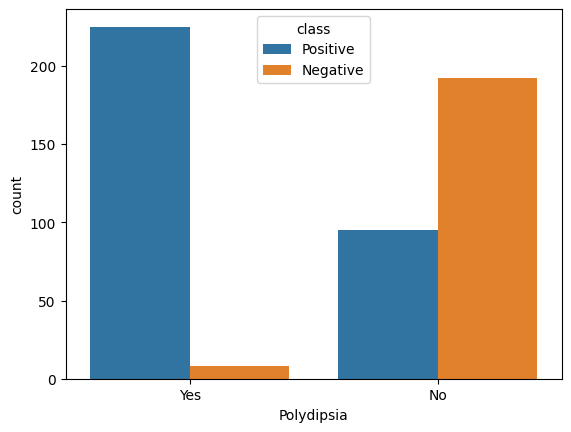

In [32]:
#distribution of Polydipsia
sns.countplot(x='Polydipsia', hue='class', data=df)

plot_criteria=['Polydipsia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize ='columns')*100,2)).style.background_gradient(cmap=cm)

class,Negative,Positive
sudden weight loss,,
No,85.500000,41.250000
Yes,14.500000,58.750000


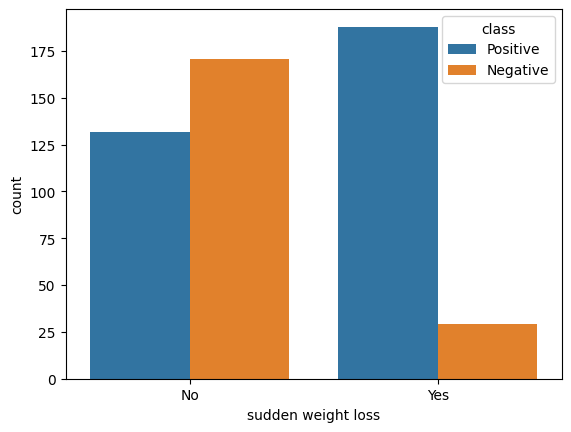

In [33]:
#Distribution of sudden weight loss
sns.countplot(x='sudden weight loss', hue='class', data=df)

plot_criteria = ['sudden weight loss','class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]],normalize='columns')*100,2)).style.background_gradient(cmap=cm)

class,Negative,Positive
weakness,,
No,56.500000,31.870000
Yes,43.500000,68.120000


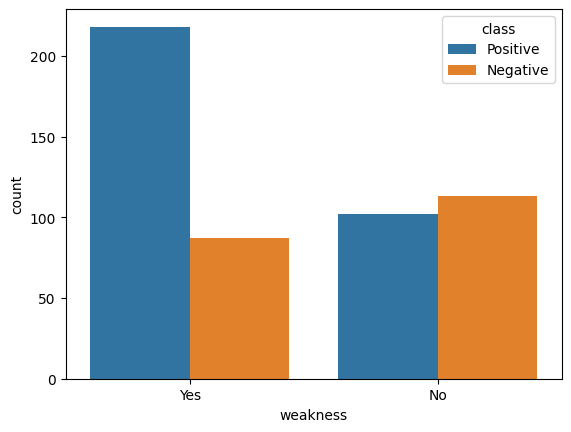

In [34]:
#Distribution of weakness
sns.countplot(x='weakness', hue='class', data=df)

plot_criteria = ['weakness','class']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]],normalize='columns')*100,2)).style.background_gradient(cmap=cm)

class,Negative,Positive
Polyphagia,,
No,76.000000,40.940000
Yes,24.000000,59.060000


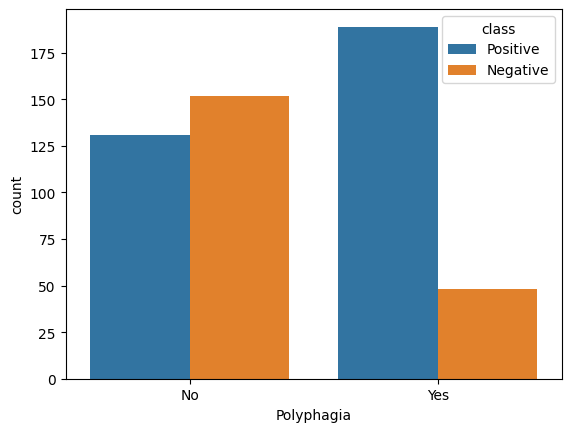

In [35]:
#Distribution of Polyphagia
sns.countplot(x='Polyphagia', hue='class', data=df)

plot_criteria = ['Polyphagia','class']
cm = sns.light_palette("pink", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]],normalize='columns')*100,2)).style.background_gradient(cmap=cm)

class,Negative,Positive
Genital thrush,,
No,83.500000,74.060000
Yes,16.500000,25.940000


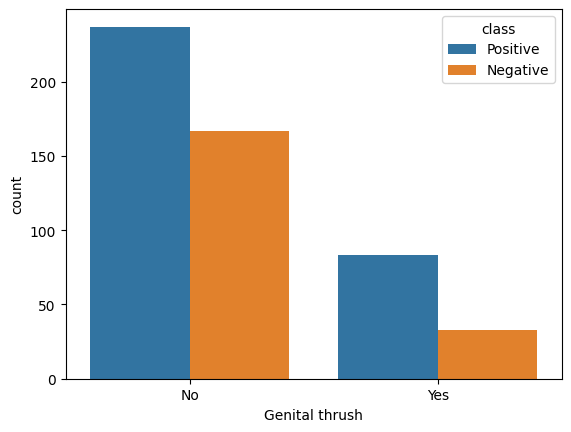

In [38]:
#Distribution of Genital thrush
sns.countplot(x='Genital thrush', hue='class', data=df)

plot_criteria = ['Genital thrush','class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]],normalize='columns')*100,2)).style.background_gradient(cmap=cm)

class,Negative,Positive
visual blurring,,
No,71.000000,45.310000
Yes,29.000000,54.690000


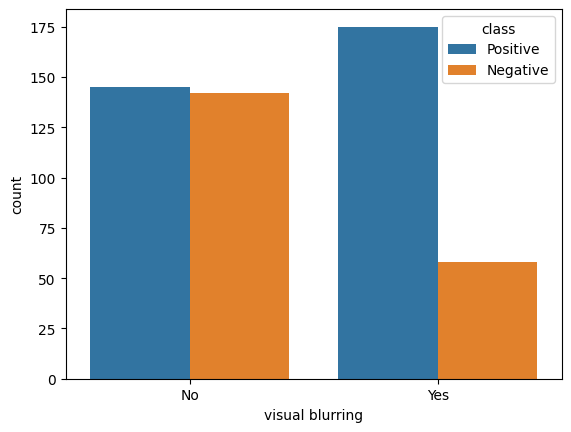

In [10]:
#Distribution of Visual blurring
sns.countplot(x='visual blurring', hue='class', data=df)

plot_criteria = ['visual blurring','class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]],normalize='columns')*100,2)).style.background_gradient(cmap=cm)

class,Negative,Positive
Itching,,
No,50.500000,51.880000
Yes,49.500000,48.120000


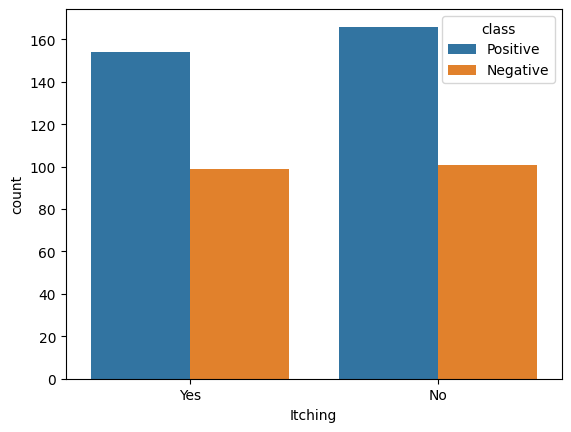

In [12]:
#Distribution of Itching
sns.countplot(x='Itching', hue='class', data=df)

plot_criteria = ['Itching','class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]],normalize='columns')*100,2)).style.background_gradient(cmap=cm)

class,Negative,Positive
Irritability,,
No,92.000000,65.620000
Yes,8.000000,34.380000


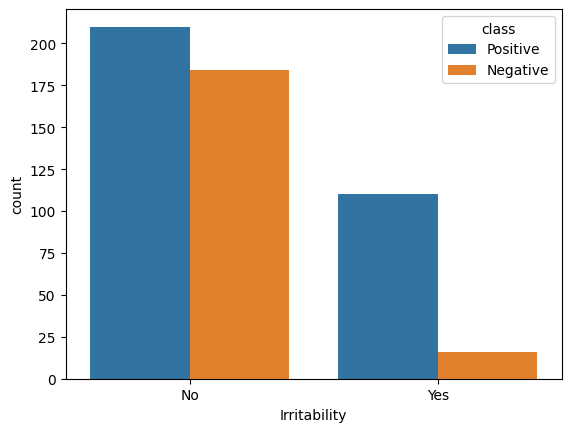

In [13]:
#Distribution of Irritability
sns.countplot(x='Irritability', hue='class', data=df)

plot_criteria = ['Irritability','class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]],normalize='columns')*100,2)).style.background_gradient(cmap=cm)

class,Negative,Positive
delayed healing,,
No,57.000000,52.190000
Yes,43.000000,47.810000


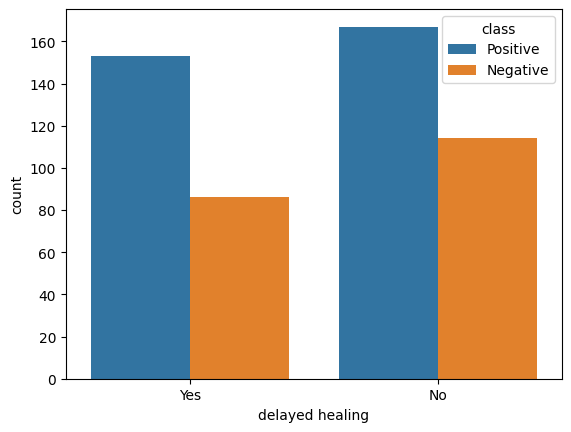

In [14]:
#Distribution of Delayed healing
sns.countplot(x='delayed healing', hue='class', data=df)

plot_criteria = ['delayed healing','class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]],normalize='columns')*100,2)).style.background_gradient(cmap=cm)

class,Negative,Positive
partial paresis,,
No,84.000000,40.000000
Yes,16.000000,60.000000


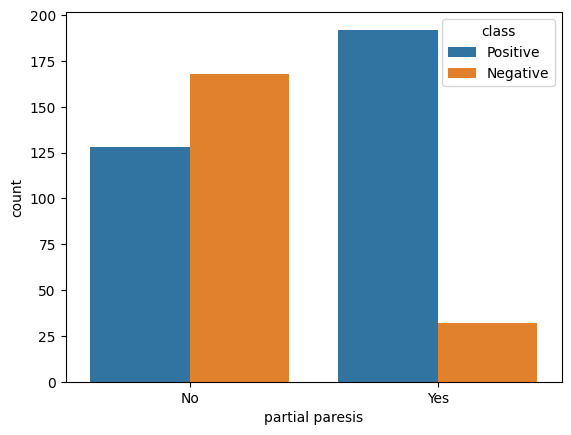

In [15]:
#Distribution of partial paresis
sns.countplot(x='partial paresis', hue='class', data=df)

plot_criteria = ['partial paresis','class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]],normalize='columns')*100,2)).style.background_gradient(cmap=cm)

class,Negative,Positive
muscle stiffness,,
No,70.000000,57.810000
Yes,30.000000,42.190000


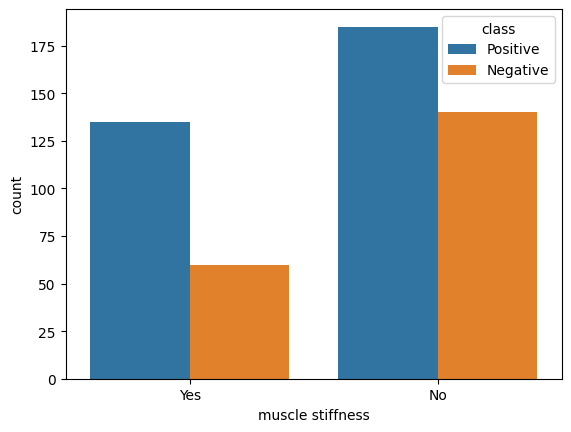

In [16]:
#Distribution of muscle stiffness
sns.countplot(x='muscle stiffness', hue='class', data=df)

plot_criteria = ['muscle stiffness','class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]],normalize='columns')*100,2)).style.background_gradient(cmap=cm)

class,Negative,Positive
Alopecia,,
No,49.500000,75.620000
Yes,50.500000,24.380000


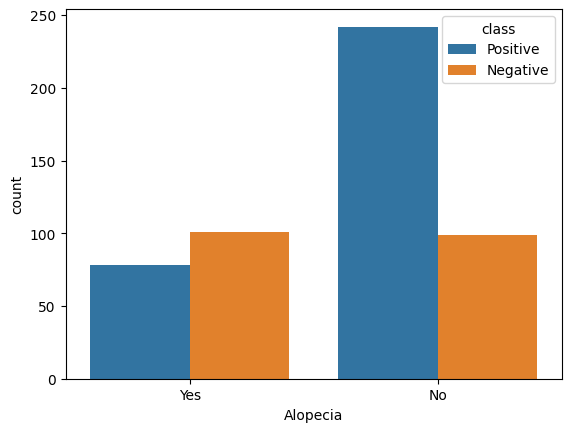

In [17]:
#Distribution of Alopecia
sns.countplot(x='Alopecia', hue='class', data=df)

plot_criteria = ['Alopecia','class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]],normalize='columns')*100,2)).style.background_gradient(cmap=cm)

class,Negative,Positive
Obesity,,
No,86.500000,80.940000
Yes,13.500000,19.060000


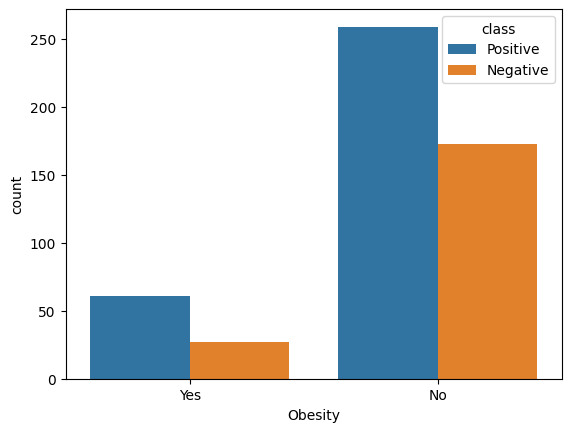

In [24]:
#Distribution of Obesity
sns.countplot(x='Obesity', hue='class', data=df)

plot_criteria = ['Obesity','class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]],normalize='columns')*100,2)).style.background_gradient(cmap=cm)

In [25]:
#occurences of Symptoms in patients

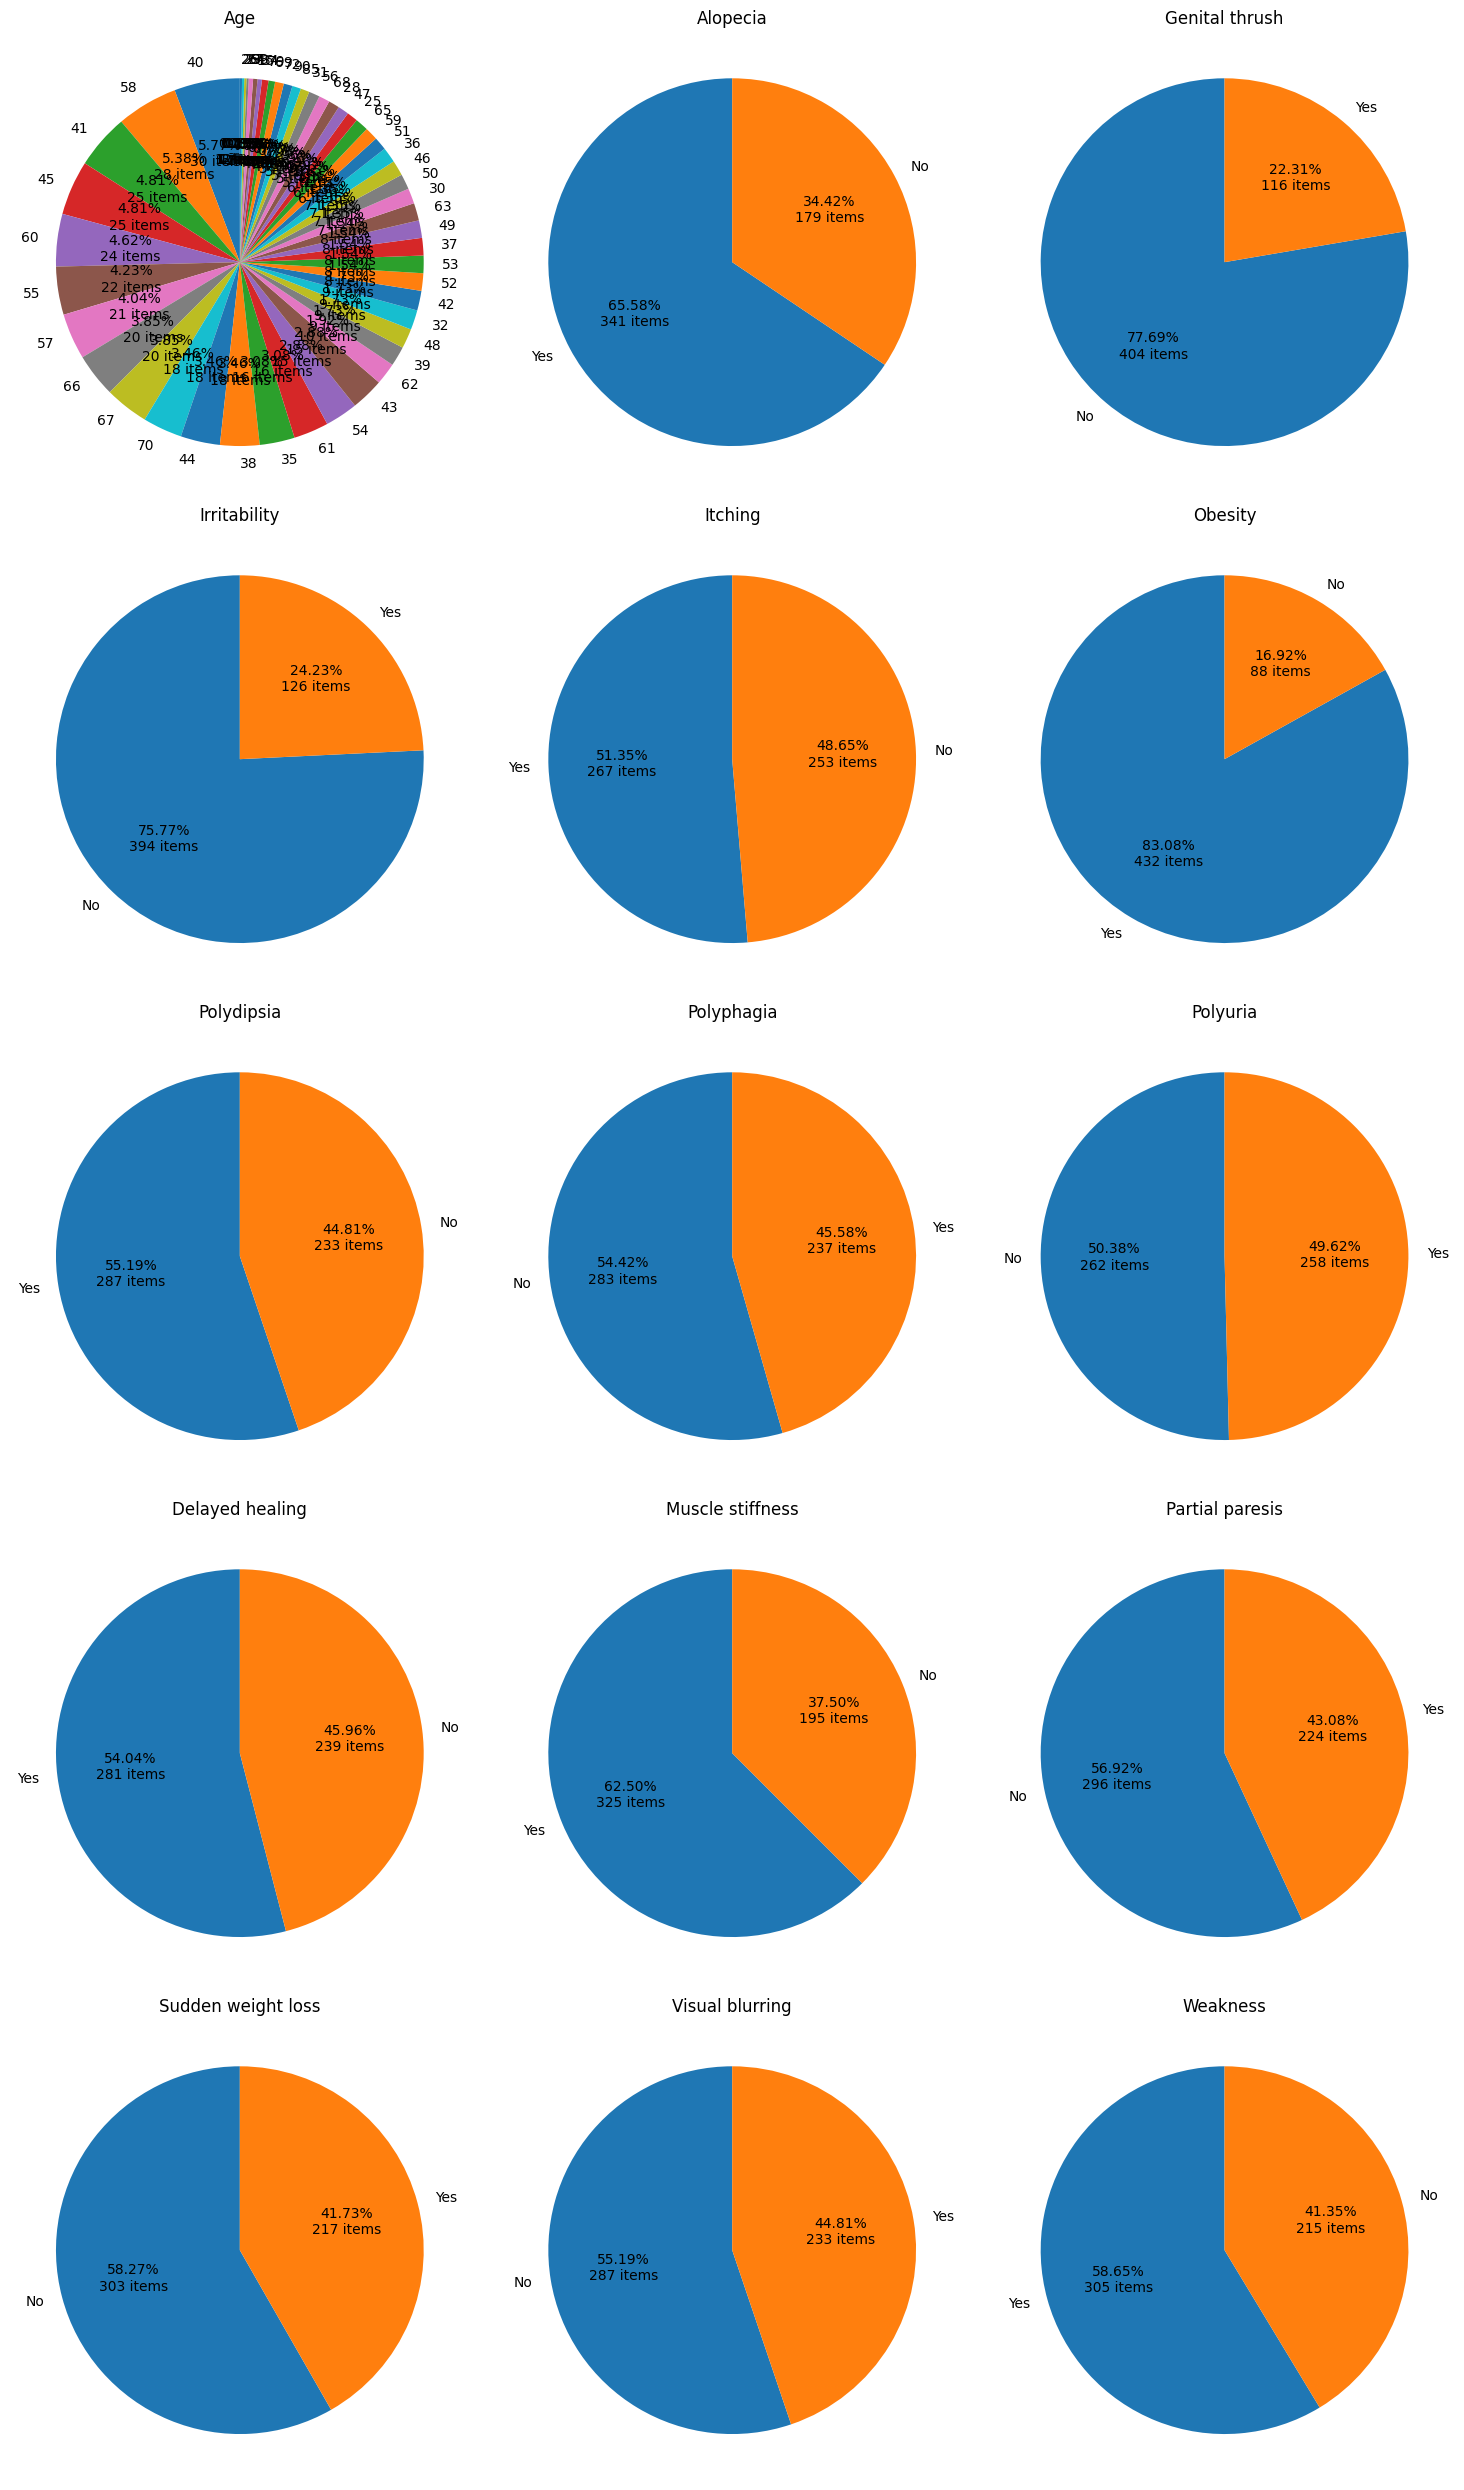

In [43]:
#Functipn for P

# Function to plot pie chart with dynamic labels
def plotpie(ax, value, title):
    unique_labels = value.unique()  # Get unique labels from the column
    
    # Plot pie chart on the provided axis
    wedges, texts, autotexts = ax.pie(
        value.value_counts(),
        startangle=90,
        labels=unique_labels,  # Use unique labels
        autopct=lambda p: f'{p:.2f}%\n{p * sum(value.value_counts()) / 100:.0f} items'
    )
    ax.set_title(title)

# Filtering symptom columns
df_symptoms = df[df.columns.difference(["age", "class", "Gender"])]

# Determine the number of rows and columns for subplots
num_columns = len(df_symptoms.columns)
num_rows = (num_columns + 2) // 3  # Adjust based on preferred grid size

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten the array for easy indexing

# Plotting pie charts for each symptom column
for i, column in enumerate(df_symptoms.columns):
    plotpie(axes[i], df_symptoms[column], column.capitalize())

# Hide any unused subplots
for j in range(len(df_symptoms.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [44]:
#Data Pre-Processing

In [47]:
#Changing the +ves to 1 and -ves to 0
df['class'] = df['class'].apply(lambda x: 0 if x=="Negative" else 1)
df['class'].head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [49]:
#Separating Target feature
X = df.drop(['class'],axis=1)
y = df['class']

In [51]:
# Storing Features
objectList = X.select_dtypes(include="object").columns
print(objectList)

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')


In [53]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in objectList:
    X[feature] = le.fit_transform(X[feature].astype(str))

print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int32
 2   Polyuria            520 non-null    int32
 3   Polydipsia          520 non-null    int32
 4   sudden weight loss  520 non-null    int32
 5   weakness            520 non-null    int32
 6   Polyphagia          520 non-null    int32
 7   Genital thrush      520 non-null    int32
 8   visual blurring     520 non-null    int32
 9   Itching             520 non-null    int32
 10  Irritability        520 non-null    int32
 11  delayed healing     520 non-null    int32
 12  partial paresis     520 non-null    int32
 13  muscle stiffness    520 non-null    int32
 14  Alopecia            520 non-null    int32
 15  Obesity             520 non-null    int32
dtypes: int32(15), int64(1)
memory usage: 34.7 KB

In [54]:
X.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [55]:
#Correlation between features
X.corrwith(y)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64

<Axes: title={'center': 'Correlation with Diabetes'}>

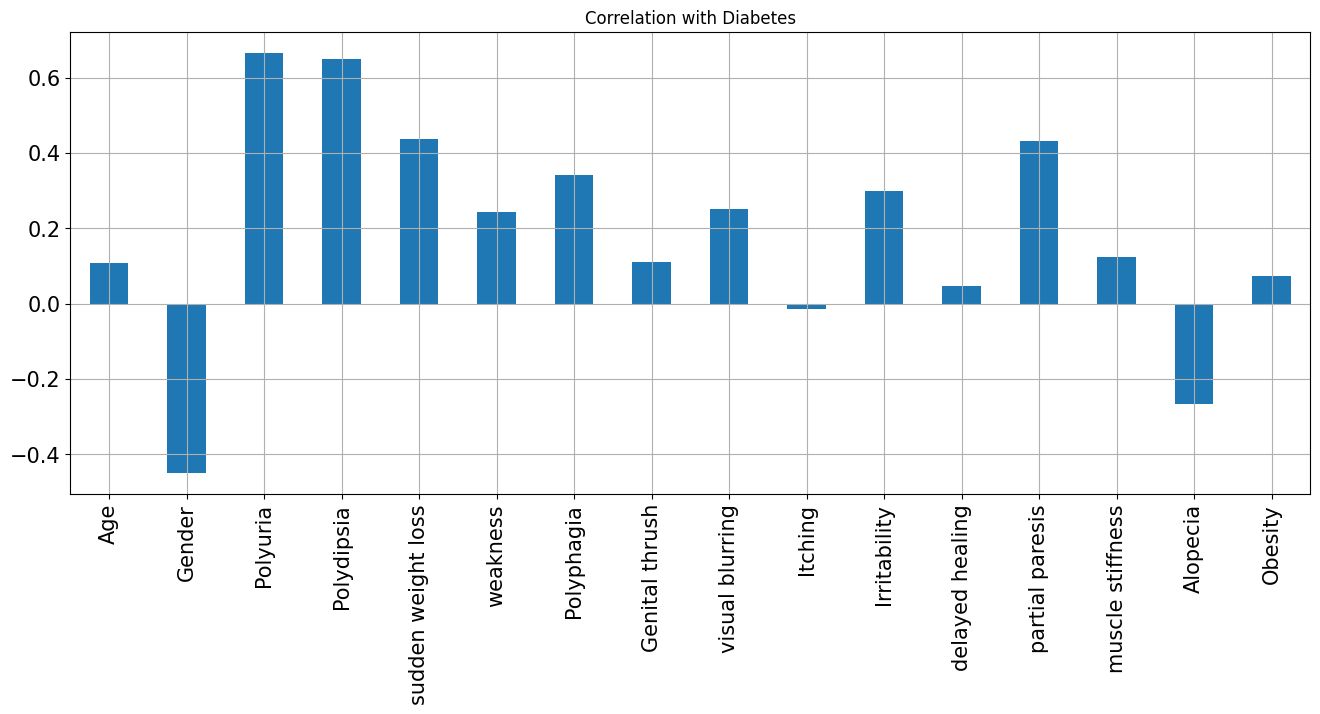

In [56]:
#correlation with Response Variable class
X.corrwith(y).plot.bar(
    figsize = (16,6), title = "Correlation with Diabetes", fontsize = 15, rot=90, grid=True)

In [58]:
#Train and Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=12345)

In [60]:
## checking distribution of target variable in train test split
print('Distribution of target variable in training set')
print(y_train.value_counts())

print('Distribution of target variable in test set')
print(y_test.value_counts())

Distribution of target variable in training set
class
1    256
0    160
Name: count, dtype: int64
Distribution of target variable in test set
class
1    64
0    40
Name: count, dtype: int64


In [63]:
# Data Normalization
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

In [65]:
X_train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
515,0.310811,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
169,0.513514,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0
122,0.324324,1,0,1,0,1,1,0,0,1,1,1,1,1,0,1
278,0.297297,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
188,0.729730,1,1,0,1,1,1,1,0,0,1,1,1,1,1,0


In [67]:
#Feature Selection
X.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [68]:
X.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [71]:
X_FS = X[['Polyuria', 'Polydipsia','Age', 'Gender','partial paresis','sudden weight loss','Irritability', 'delayed healing','Alopecia','Itching']]
X_train, X_test, y_train, y_test = train_test_split(X_FS,y,test_size=0.2,stratify=y,random_state=12345)

In [74]:
#Data Normalization

minman=MinMaxScaler()
X_train[['Age']]=minmax.fit_transform(X_train[['Age']])
X_test[['Age']]=minmax.transform(X_test[['Age']])

In [75]:
#Model Building

In [92]:
#logistic Regression
logi=LogisticRegression(random_state=0, penalty='elasticnet', l1_ratio=0.5, solver='saga')
logi.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', random_state=0,
                   solver='saga')

In [89]:
#Cross validation
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=None)
scoring = 'accuracy'

acc_logi = cross_val_score(estimator=logi,X=X_train, y=y_train, cv= kfold,scoring=scoring)
acc_logi.mean()

0.9013356562137049

In [93]:
# Model Evaluation
y_predict_logi = logi.predict(X_test)
y_predict_prob = logi.predict_proba(X_test)[:,1]
acc = accuracy_score(y_test, y_predict_logi)
roc = roc_auc_score(y_test, y_predict_prob)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test,y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

results = pd.DataFrame([['Logistic Regression', acc, acc_logi.mean(), prec, rec, f1, roc]], columns= ['Model','Accuracy','Cross Val Accuracy','Precision','Recall','F1 Score','ROC'])
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.384615,0.901336,0.0,0.0,0.0,0.790625


In [94]:
# Random Forest
rf = RandomForestClassifier(criterion='gini',n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [97]:
#Cross Validation
kfold=model_selection.KFold(n_splits=10, random_state=None)
scoring='accuracy'

acc_rf = cross_val_score(estimator = rf, X=X_train, y=y_train, cv=kfold, scoring=scoring)
acc_rf.mean()

0.9639372822299652

In [102]:
#Model Evaluration
y_predict_r = rf.predict(X_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test,y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results= pd.DataFrame([['Random Forest', acc, acc_rf.mean(), prec, rec, f1, roc]], columns=['Model','Accuracy','Cross Val Accuracy','Precision','Recall','F1 Score','ROC'])
results=pd.concat([results, model_results], ignore_index=True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.384615,0.901336,0.000000,0.000000,0.000000,0.790625
1,Random Forest,0.980769,0.963937,0.984375,0.984375,0.984375,0.979688


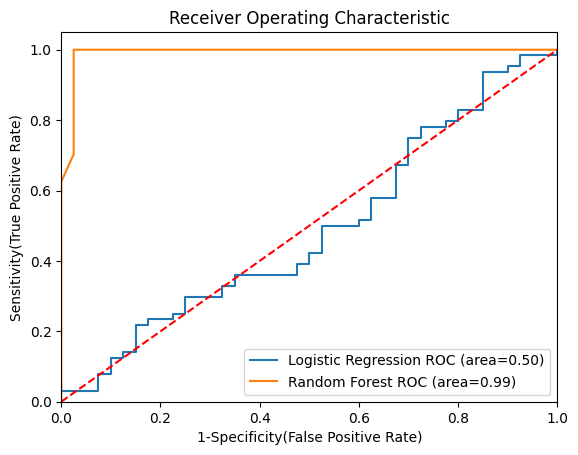

In [104]:
#Plotting ROC
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

models=[
    {
        'label':'Logistic Regression',
        'model': LogisticRegression(random_state=0, penalty=None),
    },
    {
        'label':'Random Forest',
        'model' : RandomForestClassifier(n_estimators=100, criterion='gini', random_state=47),
    },
]

#loop for iterating through the models list
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
#Compute False positive, True Positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])

#Calculting Area under the curve
    auc = metrics.roc_auc_score(y_test, model.predict(X_test))
    
    plt.plot(fpr,tpr,label='%s ROC (area=%0.2f)' % (m['label'],auc))

plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()